In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [6]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
354,36,99000,1
80,30,80000,0
276,38,71000,0
132,30,87000,0
114,42,80000,0


In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state = 0)

x_train.shape,x_test.shape

((280, 2), (120, 2))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)
 

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled =pd.DataFrame(x_test_scaled, columns =x_test.columns)

In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


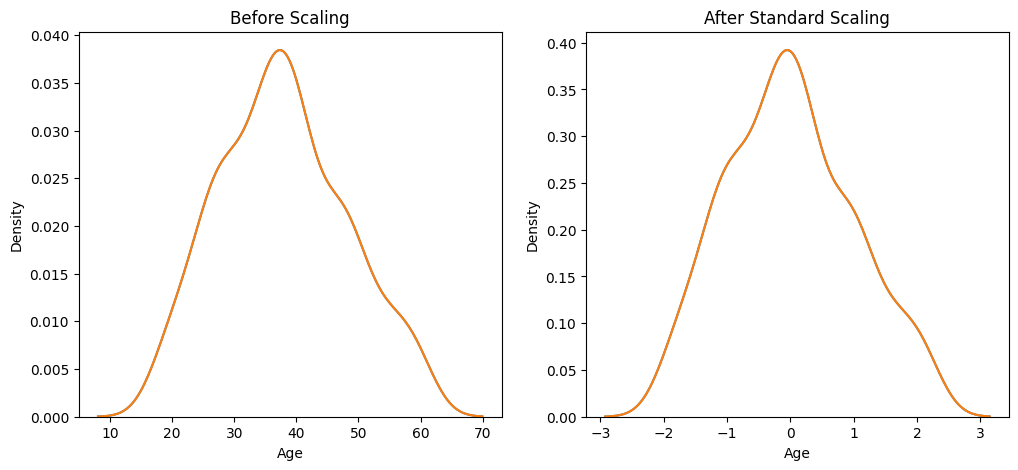

In [20]:
fig ,(ax1, ax2) = plt.subplots(ncols= 2 ,figsize = (12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax = ax1)
sns.kdeplot(x_train['Age'],ax = ax1)

#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [27]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [29]:
# Data to append
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Use pd.concat to add new rows
df = pd.concat([df, new_data], ignore_index=True)


In [30]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


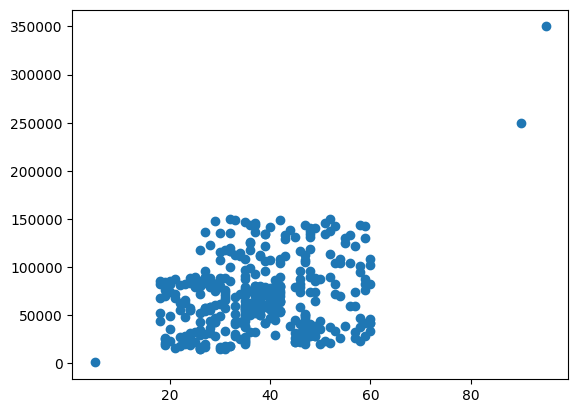

In [31]:
plt.scatter(df['Age'],df['EstimatedSalary'])